In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\5\My_Study\crawling_result\university_UK.csv") ; df

,Index,University name,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Graduate prospects
0,1,Bath Spa University,84%,37%,80%,67%,29%,0%
1,2,University of Chichester,80%,42%,75%,0%,0%,0%
2,3,Canterbury Christ Church University,76%,40%,70%,0%,0%,49%
3,4,Buckinghamshire New University,78%,39%,82%,0%,0%,52%
4,5,Middlesex University,82%,48%,80%,57%,75%,54%
...,...,...,...,...,...,...,...,...
105,109,University of Cambridge,100%,95%,0%,84%,93%,96%
106,105,University of Bath,94%,73%,84%,73%,96%,97%
107,106,University of Exeter,93%,63%,82%,74%,100%,97%
108,107,Liverpool Hope University,90%,51%,84%,53%,88%,98%


In [209]:
# 데이터에 index 컬럼을 제거한다
# load 할때 index_col=0 을 써도 되지만 나중에 인덱스 리셋하려고 이렇게 지웠음
df.drop(columns='Index', inplace=True)
# 잘 지워졌나 확인
df 

,University name,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Graduate prospects
0,Bath Spa University,84%,37%,80%,67%,29%,0%
1,University of Chichester,80%,42%,75%,0%,0%,0%
2,Canterbury Christ Church University,76%,40%,70%,0%,0%,49%
3,Buckinghamshire New University,78%,39%,82%,0%,0%,52%
4,Middlesex University,82%,48%,80%,57%,75%,54%
...,...,...,...,...,...,...,...
105,University of Cambridge,100%,95%,0%,84%,93%,96%
106,University of Bath,94%,73%,84%,73%,96%,97%
107,University of Exeter,93%,63%,82%,74%,100%,97%
108,Liverpool Hope University,90%,51%,84%,53%,88%,98%


In [210]:
# 데이터의 정보를 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   University name       110 non-null    object
 1   Overall score         110 non-null    object
 2   Entry standards       110 non-null    object
 3   Student satisfaction  110 non-null    object
 4   Research quality      110 non-null    object
 5   Research intensity    110 non-null    object
 6   Graduate prospects    110 non-null    object
dtypes: object(7)
memory usage: 6.1+ KB


In [211]:
# 데이터에 결측치가 없는지 확인
df.isna().sum()

University name         0
Overall score           0
Entry standards         0
Student satisfaction    0
Research quality        0
Research intensity      0
Graduate prospects      0
dtype: int64

In [212]:
# 데이터 값에 0은 없는지 확인
(df==0).sum()

University name         0
Overall score           0
Entry standards         0
Student satisfaction    0
Research quality        0
Research intensity      0
Graduate prospects      0
dtype: int64

In [213]:
# 컬럼명을 알아보기 쉽게 한글로 변경
df = df.rename(columns=({'University name' : '대학명',
            'Overall score' : '종합점수%',
            'Entry standards' : '입학기준%',
            'Student satisfaction': '학생만족도%비율',
            'Research quality':'연구품질%',
            'Research intensity':'연구강도%',
            'Graduate prospects': '졸업예정자%' } ) ) ; df

,대학명,종합점수%,입학기준%,학생만족도%비율,연구품질%,연구강도%,졸업예정자%
0,Bath Spa University,84%,37%,80%,67%,29%,0%
1,University of Chichester,80%,42%,75%,0%,0%,0%
2,Canterbury Christ Church University,76%,40%,70%,0%,0%,49%
3,Buckinghamshire New University,78%,39%,82%,0%,0%,52%
4,Middlesex University,82%,48%,80%,57%,75%,54%
...,...,...,...,...,...,...,...
105,University of Cambridge,100%,95%,0%,84%,93%,96%
106,University of Bath,94%,73%,84%,73%,96%,97%
107,University of Exeter,93%,63%,82%,74%,100%,97%
108,Liverpool Hope University,90%,51%,84%,53%,88%,98%


In [214]:
# 데이터 내에 '숫자%' 값이 str이라 값에 문자열 %를 제거하고
# 해당 값을 int로 변환한다
df=df.replace(regex=r'[%]', value='') # 값에서 %를 제거
df[['종합점수%','입학기준%', '학생만족도%비율', '연구품질%','연구강도%','졸업예정자%']]= df[['종합점수%','입학기준%', '학생만족도%비율', '연구품질%','연구강도%','졸업예정자%']].astype(str).astype(int)
# info()를 사용하여 잘 변환 되었는지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   대학명       110 non-null    object
 1   종합점수%     110 non-null    int32 
 2   입학기준%     110 non-null    int32 
 3   학생만족도%비율  110 non-null    int32 
 4   연구품질%     110 non-null    int32 
 5   연구강도%     110 non-null    int32 
 6   졸업예정자%    110 non-null    int32 
dtypes: int32(6), object(1)
memory usage: 3.6+ KB


In [219]:
# 위에서 0인 값들을 찾을 때 값들이 str이었으니
# 값에 0이 있는지 다시 찾아보자
(df==0).sum()

대학명          0
종합점수%        0
입학기준%        1
학생만족도%비율     2
연구품질%       15
연구강도%       15
졸업예정자%       2
dtype: int64

In [220]:
# 위에서 찾은 0인 값들이 0의 의미를 알 수 없어서
# 우선 결측치로 바꾸고 제거함
df=df.replace(0, np.NaN)
df.dropna(inplace=True)
df.isna().sum()

대학명         0
종합점수%       0
입학기준%       0
학생만족도%비율    0
연구품질%       0
연구강도%       0
졸업예정자%      0
dtype: int64

In [221]:
df # 110개이던 데이터가 92개가 되었음

,대학명,종합점수%,입학기준%,학생만족도%비율,연구품질%,연구강도%,졸업예정자%
4,Middlesex University,82,48.0,80.0,57.0,75.0,54.0
5,"City, University of London",83,51.0,77.0,69.0,63.0,59.0
6,"Goldsmiths, University of London",85,54.0,77.0,70.0,100.0,61.0
7,University of Bedfordshire,81,42.0,77.0,58.0,57.0,61.0
9,University of the West of Scotland,83,51.0,80.0,54.0,23.0,63.0
...,...,...,...,...,...,...,...
104,University of Warwick,93,77.0,71.0,88.0,79.0,95.0
106,University of Bath,94,73.0,84.0,73.0,96.0,97.0
107,University of Exeter,93,63.0,82.0,74.0,100.0,97.0
108,Liverpool Hope University,90,51.0,84.0,53.0,88.0,98.0


In [222]:
# index 숫자가 정렬이 안되어 있으니 index를 재정의 해준다
df.reset_index(drop=True, inplace=True) ; df

,대학명,종합점수%,입학기준%,학생만족도%비율,연구품질%,연구강도%,졸업예정자%
0,Middlesex University,82,48.0,80.0,57.0,75.0,54.0
1,"City, University of London",83,51.0,77.0,69.0,63.0,59.0
2,"Goldsmiths, University of London",85,54.0,77.0,70.0,100.0,61.0
3,University of Bedfordshire,81,42.0,77.0,58.0,57.0,61.0
4,University of the West of Scotland,83,51.0,80.0,54.0,23.0,63.0
...,...,...,...,...,...,...,...
87,University of Warwick,93,77.0,71.0,88.0,79.0,95.0
88,University of Bath,94,73.0,84.0,73.0,96.0,97.0
89,University of Exeter,93,63.0,82.0,74.0,100.0,97.0
90,Liverpool Hope University,90,51.0,84.0,53.0,88.0,98.0


<Axes: xlabel='연구강도%', ylabel='졸업예정자%'>

c:\Users\5\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\5\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  func(*args, **kwargs)
c:\Users\5\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
c:\Users\5\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\Users\5\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\5\App

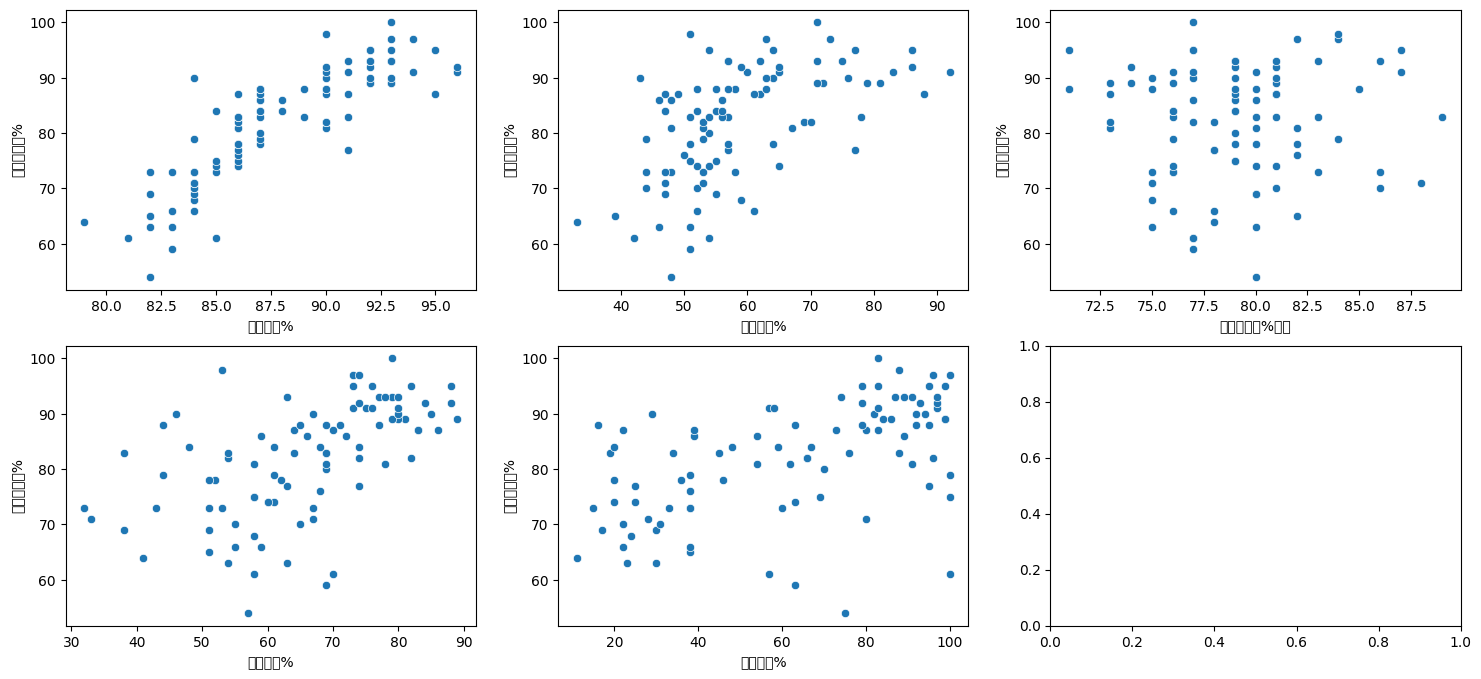

In [242]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18,8)
sns.scatterplot(data = df, x='종합점수%', y='졸업예정자%',ax=ax1)
sns.scatterplot(data = df, x='입학기준%', y='졸업예정자%',ax=ax2)
sns.scatterplot(data = df, x='학생만족도%비율', y='졸업예정자%',ax=ax3)
sns.scatterplot(data = df, x='연구품질%', y='졸업예정자%',ax=ax4)
sns.scatterplot(data = df, x='연구강도%', y='졸업예정자%',ax=ax5)

In [249]:
# 그래프의 한글이 깨지니까 한글이 되게 해보자
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<Axes: xlabel='연구강도%', ylabel='졸업예정자%'>

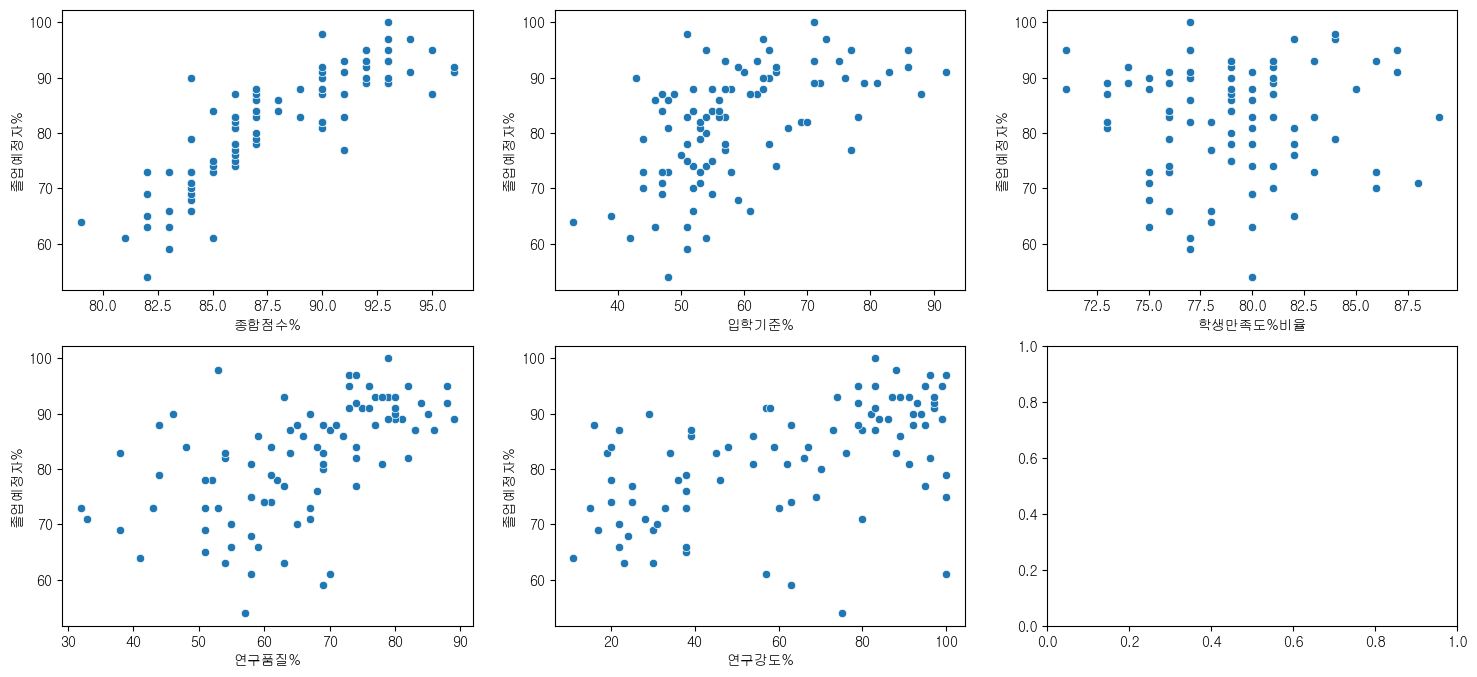

In [251]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18,8)
sns.scatterplot(data = df, x='종합점수%', y='졸업예정자%',ax=ax1)
sns.scatterplot(data = df, x='입학기준%', y='졸업예정자%',ax=ax2)
sns.scatterplot(data = df, x='학생만족도%비율', y='졸업예정자%',ax=ax3)
sns.scatterplot(data = df, x='연구품질%', y='졸업예정자%',ax=ax4)
sns.scatterplot(data = df, x='연구강도%', y='졸업예정자%',ax=ax5)

<Axes: xlabel='연구강도%', ylabel='졸업예정자%'>

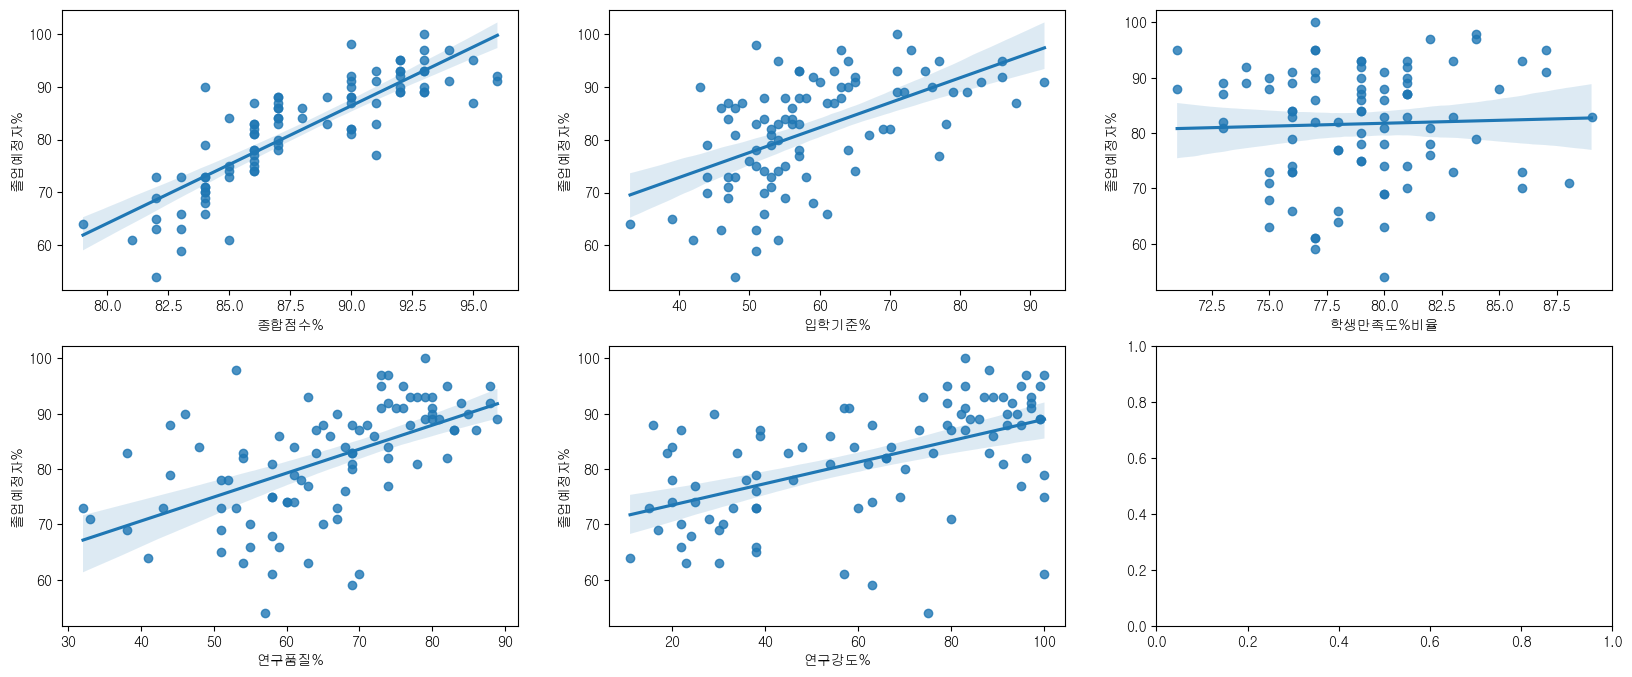

In [275]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(20,8)
sns.regplot(data = df, x='종합점수%', y='졸업예정자%',ax=ax1)
sns.regplot(data = df, x='입학기준%', y='졸업예정자%',ax=ax2)
sns.regplot(data = df, x='학생만족도%비율', y='졸업예정자%',ax=ax3)
sns.regplot(data = df, x='연구품질%', y='졸업예정자%',ax=ax4)
sns.regplot(data = df, x='연구강도%', y='졸업예정자%',ax=ax5)

ValueError: could not convert string to float: 'Middlesex University'

In [268]:
df

,대학명,종합점수%,입학기준%,학생만족도%비율,연구품질%,연구강도%,졸업예정자%
0,Middlesex University,82,48.0,80.0,57.0,75.0,54.0
1,"City, University of London",83,51.0,77.0,69.0,63.0,59.0
2,"Goldsmiths, University of London",85,54.0,77.0,70.0,100.0,61.0
3,University of Bedfordshire,81,42.0,77.0,58.0,57.0,61.0
4,University of the West of Scotland,83,51.0,80.0,54.0,23.0,63.0
...,...,...,...,...,...,...,...
87,University of Warwick,93,77.0,71.0,88.0,79.0,95.0
88,University of Bath,94,73.0,84.0,73.0,96.0,97.0
89,University of Exeter,93,63.0,82.0,74.0,100.0,97.0
90,Liverpool Hope University,90,51.0,84.0,53.0,88.0,98.0


<Axes: >

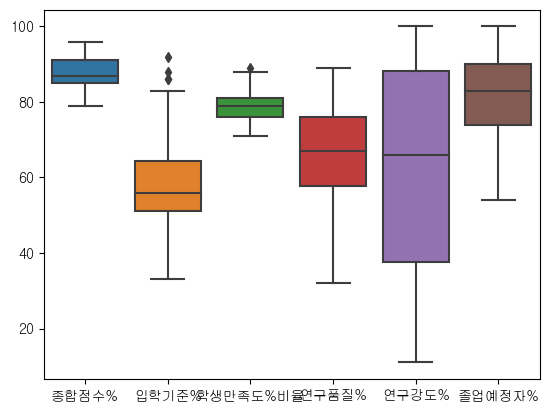

In [253]:
sns.boxplot(df)